# Prediction using Decision Tree Algorithm :The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.warn('my warning')

<ipython-input-1-64abbdae91a5>:7: UserWarning: my warning
  warnings.warn('my warning')


# Data Exploration

In [4]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


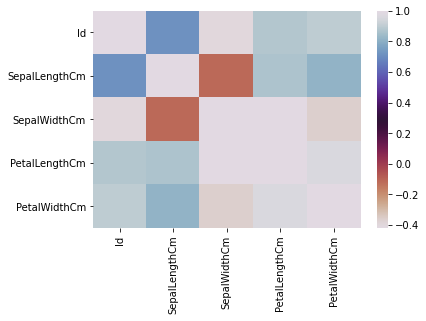

In [13]:
sns.heatmap(data.corr() , cmap = "twilight_r")

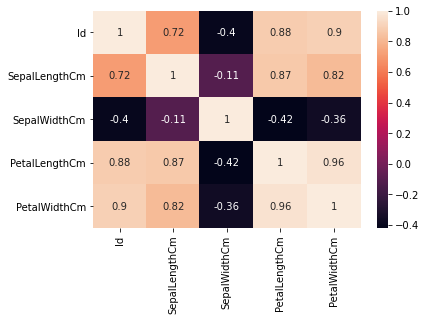

In [14]:
sns.heatmap(data.corr(),annot=True)

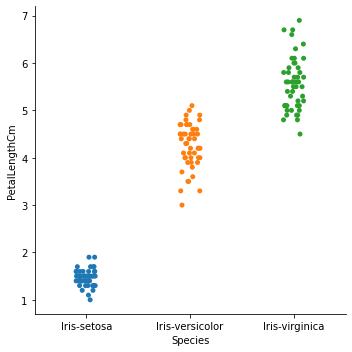

In [15]:
sns.catplot(x ='Species',y ='PetalLengthCm', data = data)

In [17]:
x = data.iloc[:,[1,2,3,4]].values
y = data.iloc[:,-1].values

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
y_new = ohe.fit_transform(data[['Species']])
y_new

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [18]:

df = pd.DataFrame(y_new)
df.rename(columns={0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}, inplace=True)
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [21]:
result = pd.concat([data,df] ,axis = 1)
result.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0


In [20]:
result

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0.0,0.0,1.0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0.0,0.0,1.0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0.0,0.0,1.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.0,0.0,1.0


In [22]:
new_x = result.iloc[:,[1,2,3,4]].values
new_y = result.iloc[:,[5,6,7]].values

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
train_x,test_x,train_y,test_y = train_test_split(new_x ,new_y ,test_size = 0.2 ,random_state = 1)
print("Shape of train_x is {}".format(train_x.shape))
print("Shape of train_y is {}".format(train_y.shape))
print("Shape of test_x is  {}".format(test_x.shape))
print("Shape of test_y is  {}".format(test_y.shape))

Shape of train_x is (120, 4)
Shape of train_y is (120, 3)
Shape of test_x is  (30, 4)
Shape of test_y is  (30, 3)


In [24]:
pip install dtc

Note: you may need to restart the kernel to use updated packages.


In [25]:
data = data.copy()
x = data.iloc[:,1:4]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43)

In [26]:
print(x_train.shape)

print(y_train.shape)

print(y_test.shape)

print(x_test.shape)

(112, 3)
(112,)
(38,)
(38, 3)


# Decision Tree Algorithm :

In [28]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [29]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.91      0.83      0.87        12

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



In [30]:
print("Training Score: ",clf.score(x_train,y_train))

Training Score:  1.0


In [31]:
print(accuracy_score(y_test,y_pred))

0.9210526315789473


In [32]:
print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0 11  1]
 [ 0  2 10]]


In [33]:
data = {'y_Actual': y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data)
df.reset_index(inplace = True, drop = True)
df.head()

,y_Actual,y_Predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-virginica,Iris-virginica


In [34]:
pip install clf

  Created wheel for clf: filename=clf-0.5.7-py3-none-any.whl size=6391 sha256=d38b01ae30e8e02d32b52dc5ad30278389728ffb65889f266b2ff245c99b9d71
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\d3\2d\cb\b6f50db5dfba03b5edd7599a5f94fdfce46df3e8dc5fa33959
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=2f1b5de16c8f910fdd7b65e7c16f9fffa17e392f6493b0d967d041eb16b2d84f
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built clf docopt
Note: you may need to restart the kernel to use updated packages.


# PREDICTIONS USING DECISION TREE

In [35]:
pred=clf.predict(x_test)  # To make predictions on the test dataset
print(pred)

['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica']


In [36]:
print(clf.score(x_test,y_test))

0.9210526315789473


# DECISION TREE FINAL OUTPUT

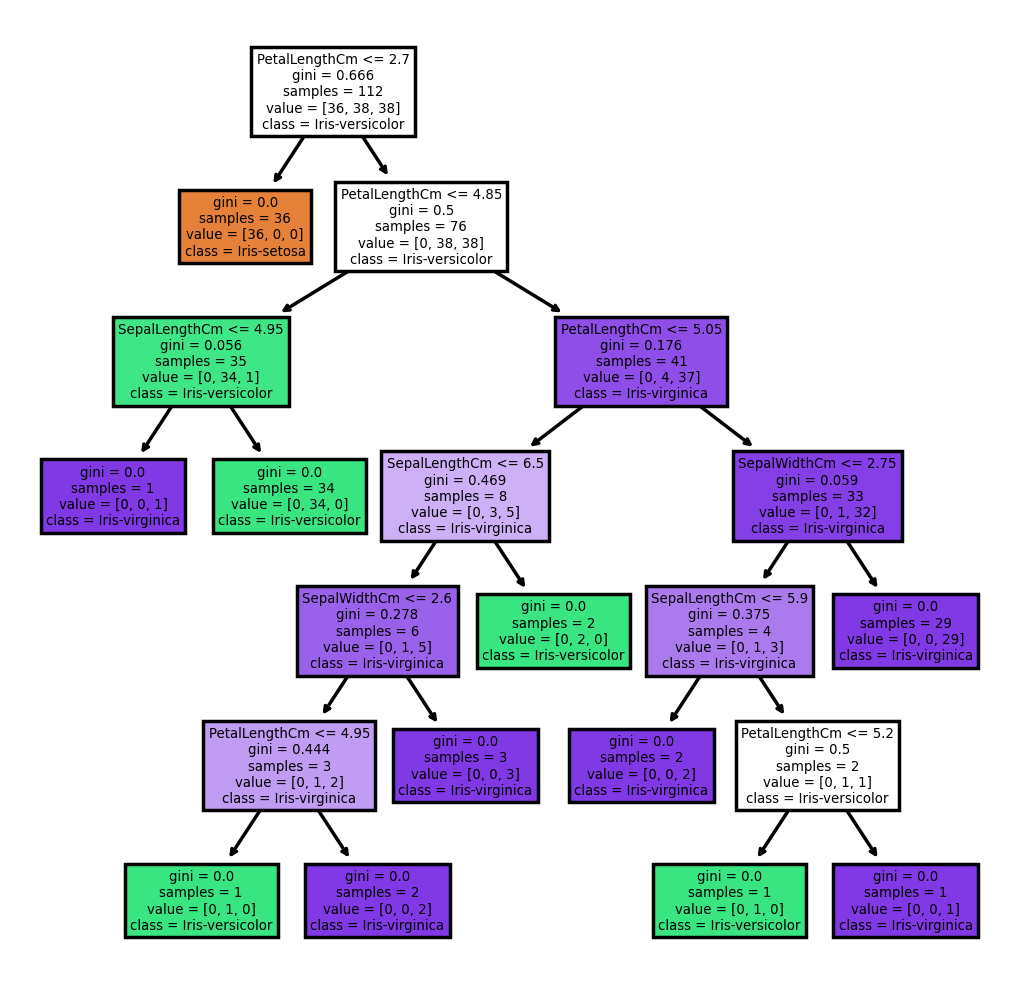

In [37]:
from sklearn import tree

feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250,facecolor='white')

tree.plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True);
fig.savefig('IrisTreeClassifier.png')